# Aufgabe 1:

In [ ]:
from Blatt07_lib import *
import matplotlib.pyplot as plt

def cg(a, b, x_0):
    res = []
    x = x_0
    p = r_0 = r = b - a.dot(x_0)
    res.append(np.linalg.norm(r) / np.linalg.norm(r_0))
    while np.linalg.norm(r) / np.linalg.norm(r_0) > 1e-6:
        alpha = r.dot(r) / p.dot(a.dot(p))
        r_ = r - alpha * a.dot(p)
        beta = r_.dot(r_) / r.dot(r)
        r = r_
        p = r_ + beta * p
        x += alpha * p
        res.append(np.linalg.norm(r) / np.linalg.norm(r_0))
    return (x, res)


for m in (50, 100, 200):
    a, b = system(m)
    x, res = cg(a, b, b)
    plt.semilogy(range(len(res)), res, label=f'm={m}')

plt.xlabel('Iterationen')
plt.ylabel('$||r_k||_2 / ||r_0||_2$')
plt.legend()
plt.tight_layout()
plt.show()

# AUFGABE: 3

98.06763317710936
19.662277480954643
8.889119693276559
3.662335962319832
3.640116255145995
1.2902558116361322
1.135306217236295
0.14865402017567309
0.06182326427778409
0.051442003217889276
0.03458941840096338
0.02695045253512334
0.012344167605100919
0.009708040255721636
0.009236757084528341
0.008424105495162948
0.00710868608440526
0.005014569985925964
0.004962804689873381
0.0032279129015971974
0.0013678938143218654
0.0011878730208602882


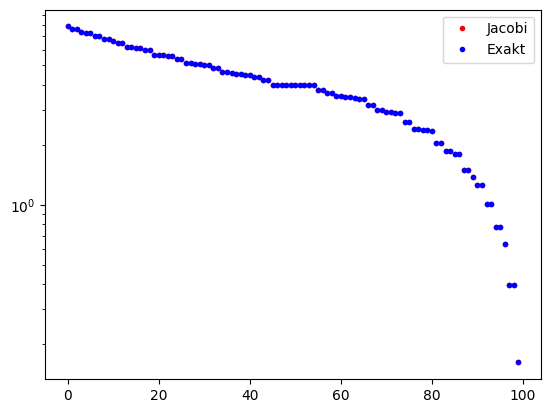

In [17]:
from Blatt07_lib import *
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
import math

def sign(x):
    return -1 if x < 0 else 1


def square_sum_of_subdiagonal(a):
    a_ = abs(a.copy())
    np.fill_diagonal(a_, 0)
    return np.sum(a_**2)


def largest_not_diagonal(a, n):
    a_ = abs(a.copy())
    np.fill_diagonal(a_, 0)
    mx = np.argmax(a_)
    i = mx // n
    j = mx % n
    return i, j


def jacobi_ew(a, sorted=True):
    n = a.shape[0]
    assert(a.shape == (n, n))
    Q = np.eye(n, n)
    i=0
    while (square_sum_of_subdiagonal(a) > 1e-3):
        i += 1
        if i % 100 == 0:
            print(square_sum_of_subdiagonal(a))
        i, j = largest_not_diagonal(a, n)
        q = scipy.sparse.eye(n, format='lil')
        alpha = (a[j, j] - a[i, i]) / (2 * a[i, j])
        c = math.sqrt(0.5 + 0.5 * math.sqrt((alpha**2)/(1+alpha**2)))
        s = sign(alpha) / (2 * c * math.sqrt(1+alpha**2))
        q[j, j] = q[i, i] = c
        q[i, j] = s
        q[j, i] = -s
        a = q.T @ a @ q
        # Q = q @ Q
    ew = np.diag(a)
    if sorted:
        ind = np.argsort(ew)
        ew = ew[ind]
        Q = Q[:, ind]
    return ew, Q


m = 10
n = m**2
A = Ablock(m)
ew_jac, Q = jacobi_ew(A)


ew_ex = ew_exakt(m)

# Vergleichen von Eigenwerten
plt.semilogy(ew_jac[::-1], 'r.', label='Jacobi')
plt.semilogy(ew_ex, 'b.', label='Exakt')
plt.legend()
plt.show()
